In [1]:
# adjsut the basic logging lovel of notebook
import logging
logging.basicConfig(level=logging.WARNING)

import os
import yaml
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
from matplotlib.lines import Line2D
from palettable.colorbrewer import qualitative

import auditory_cortex.analysis as analysis
from auditory_cortex import results_dir, aux_dir, saved_corr_dir
from auditory_cortex.utils import CorrelationUtils

from pycolormap_2d import ColorMap2DBremm, ColorMap2DZiegler
%matplotlib inline

### separate strf for thirds...

In [5]:
STRF_file_path = os.path.join(saved_corr_dir, 'STRF_corr_results.csv')
baseline_corr = pd.read_csv(STRF_file_path)
baseline_corr.head(5)

,session,channel,bin_width,delay,strf_corr,normalizer,strf_corr_normalized
0,200206.0,0.0,20.0,0.0,0.118883,0.183260,0.277706
1,200206.0,1.0,20.0,0.0,0.197218,0.221996,0.418575
2,200206.0,2.0,20.0,0.0,0.154856,0.139223,0.415023
3,200206.0,3.0,20.0,0.0,0.331080,0.413683,0.509952
4,200206.0,4.0,20.0,0.0,0.087961,0.122561,0.251256


In [10]:
STRF_file_path = os.path.join(saved_corr_dir, 'STRF_1_third_corr_results.csv')
baseline_corr = pd.read_csv(STRF_file_path)
baseline_corr.head(5)

,session,channel,bin_width,delay,strf_corr,normalizer
0,180413.0,0.0,20.0,0.0,0.061003,0.010217
1,180413.0,1.0,20.0,0.0,-0.005814,-0.007085
2,180413.0,2.0,20.0,0.0,-0.015251,0.005469
3,180413.0,3.0,20.0,0.0,0.020227,-0.005645
4,180413.0,4.0,20.0,0.0,0.003566,-0.023340


### copy normalizer for strf files...

In [9]:
from auditory_cortex.utils import CorrelationUtils
print("Copying normalizer...")
strf_identifier = 'STRF_3_third'
CorrelationUtils.copy_normalizer(strf_identifier)

Copying normalizer...
Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_3_third_corr_results.csv
Reading normalizers from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_3_third_corr_results.csv


### separate reporting for core and belt...

Baseline median: 0.143


Text(0.5, 1.0, 'wave2letter_modified_opt_neural_delay_1_third, area-belt')

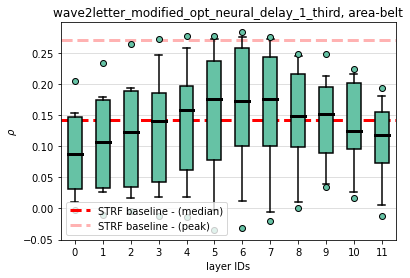

In [7]:
from auditory_cortex import area_to_sessions

third = 1
# corr_results = 'wave2letter_modified_neural_delay_only'
# corr_results = 'wave2letter_modified'
model_name = 'wave2letter_modified'
id = f'opt_neural_delay_{third}_third'
corr_results = model_name + '_' + id
corr_obj = analysis.Correlations(corr_results, third=third)

area = 'core'
area = 'belt'

sessions = area_to_sessions[area]
ax, layer_spread = corr_obj.box_plot_correlations(
    sessions=sessions,
    threshold=0.08
)
ax.set_title(f"{corr_results}, area-{area}")

In [21]:
for k,v in layer_spread.items():
    print(f"Layer-{k}", end=', ')
    print(f"Median: {np.median(v):.2f}", end=", ")
    print(f"Max: {np.max(v):.2f}")

Layer-0, Median: 0.12, Max: 0.47
Layer-1, Median: 0.18, Max: 0.56
Layer-2, Median: 0.20, Max: 0.58
Layer-3, Median: 0.22, Max: 0.59
Layer-4, Median: 0.23, Max: 0.60
Layer-5, Median: 0.22, Max: 0.65
Layer-6, Median: 0.23, Max: 0.65
Layer-7, Median: 0.23, Max: 0.64
Layer-8, Median: 0.21, Max: 0.58
Layer-9, Median: 0.20, Max: 0.56
Layer-10, Median: 0.18, Max: 0.50
Layer-11, Median: 0.15, Max: 0.46


### plotting sig. recording sites..

In [2]:
normalizer_results = 'wave2letter_modified_normalizer2'
corr_obj = analysis.Correlations(normalizer_results)

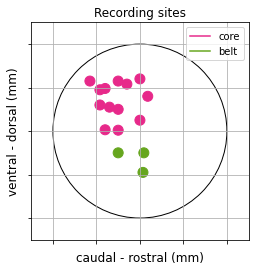

In [7]:
legend_handles = []
color_options = qualitative.Dark2_8.mpl_colors
ax = corr_obj.plot_session_coordinates(
        # subject_specific_color=True,
        core_belt_color=True,
        dot_size=100,
        threshold=0.08
        )
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f"Recording sites")
legend_handles.append(Line2D([0], [0], label='core', color=color_options[3]))
legend_handles.append(Line2D([0], [0], label='belt', color=color_options[4]))
plt.legend(handles = legend_handles)


### delete after watching...

In [2]:
from auditory_cortex import STRF

session = 200206
strf = STRF.STRF(session)


Loading Neural data for session: 200206 ... Done.


In [3]:
out = strf.get_sample(sent=12, third=1)

(69, 128)
(23, 128)


In [8]:
strf.dataset.audio(12).shape

(21914,)

In [4]:
out[0].shape

(23, 32)

In [5]:
out[1].shape

(23, 64)